In [0]:
from keras.datasets import cifar10
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
num_classes = 10

In [0]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
              'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
X_train_n = X_train.copy()
y_train_n = y_train.copy()

In [0]:
print('label = {}'.format(y_train[0:15, 0]))

label = [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]


In [0]:
print('label = {}'.format(label_names[y_train[0, 0]]))

label = frog


In [0]:
print('label = {}'.format(label_names[9]))

label = truck


label = [6 9 9 4 1 1 2 7 8 3]


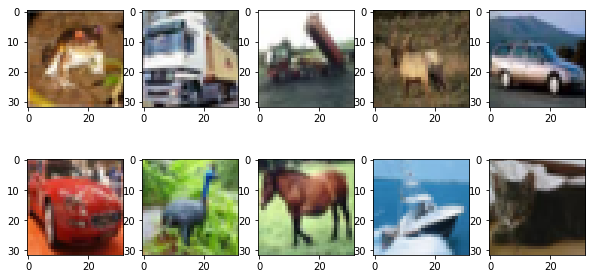

In [0]:
print('label = {}'.format(y_train[0:10, 0]))

fix, ax = plt.subplots(2, 5, figsize = (10, 5))

for i in range(5):
  ax[0][i].imshow(np.reshape(X_train[i], (32, 32, 3)))
  ax[1][i].imshow(np.reshape(X_train[i + 5], (32, 32, 3)))

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
print(y_train.shape,'\n\n',y_test)

(50000, 10) 

 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [0]:
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

In [0]:
# conv는 매트릭스로, pully는 벡터로 들어감
W1 = tf.Variable(tf.random_normal([3, 3, 3, 32], stddev = 0.01))
L1 = tf.nn.conv2d(X, W1, strides = [1, 1, 1, 1], padding = 'SAME')
L1 = tf.nn.relu(L1) # activation function
L1

<tf.Tensor 'Relu:0' shape=(?, 32, 32, 32) dtype=float32>

In [0]:
L1 = tf.nn.max_pool(L1, ksize = [1, 2, 2, 1], strides= [1, 2, 2, 1], padding = 'SAME')
L1 = tf.nn.dropout(L1, keep_prob)
L1

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<tf.Tensor 'dropout/mul_1:0' shape=(?, 16, 16, 32) dtype=float32>

### 신경망 CONV 3 * 3 * 64, activation function = relu, max_pool 2 * 2, strides = 2

In [0]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2

<tf.Tensor 'Relu_1:0' shape=(?, 16, 16, 64) dtype=float32>

In [0]:
L2 = tf.nn.max_pool(L2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L2 = tf.nn.dropout(L2, keep_prob)
L2

<tf.Tensor 'dropout_1/mul_1:0' shape=(?, 8, 8, 64) dtype=float32>

### 신경망 CONV 3 * 3 * 128, activation function = relu, max_pool 2 * 2, strides = 2

In [0]:
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev = 0.01))
L3 = tf.nn.conv2d(L2, W3, strides = [1, 1, 1, 1], padding = 'SAME')
L3 = tf.nn.relu(L3)
L3

<tf.Tensor 'Relu_2:0' shape=(?, 8, 8, 128) dtype=float32>

In [0]:
L3 = tf.nn.max_pool(L3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
L3 = tf.nn.dropout(L3, keep_prob)
L3   

<tf.Tensor 'dropout_2/mul_1:0' shape=(?, 4, 4, 128) dtype=float32>

In [0]:
W4 = tf.Variable(tf.random_normal([4 * 4 * 128, 256], stddev = 0.01))
L4 = tf.reshape(L3, [-1, 4 * 4 * 128])
L4 = tf.matmul(L4, W4)
L4 = tf.nn.relu(L4)
L4 = tf.nn.dropout(L4, keep_prob)
L4

<tf.Tensor 'dropout_3/mul_1:0' shape=(?, 256) dtype=float32>

In [0]:
W5 = tf.Variable(tf.random_normal([256, 10], stddev = 0.01))
model = tf.matmul(L4, W5)
model = tf.nn.dropout(model, keep_prob)
model

<tf.Tensor 'dropout_4/mul_1:0' shape=(?, 10) dtype=float32>

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, 
                                                                 labels = Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
batch_size = 100
total_batch = int(X_train.shape[0] / batch_size)
print(total_batch)

500


In [0]:
# 값을 가져오는 시작 위치: start.
# 몇 개를 가져올 것인가: num
# data: 우리가 사용하는 입력 데이터(입력)
# labels: 우리가 사용하는 데이터(출력)
def next_batch(start, num, data, labels):
  data_X = data[start:start + num]
  data_y = labels[start:start + num]

  return np.asarray(data_X), np.asarray(data_y)

In [0]:
print(X_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [0]:
batch_x, batch_y = next_batch(0, 10, X_train, y_train)
print(batch_x.shape, '\n\n', batch_y)

(10, 32, 32, 3) 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [0]:
total_cost = 0
epoch = 100
print('all input data: ', X_train.shape)
print('all output data: ', y_train.shape)

for j in range(epoch):
  total_cost = 0
  for i in range(total_batch):
    batch_xs, batch_ys = next_batch(batch_size * i, batch_size, X_train, y_train)
    _, cost_val = sess.run([optimizer, cost], feed_dict = {X: batch_xs, Y: batch_ys,
                                                           keep_prob: 0.8})
    total_cost += cost_val

    if (i == 0 or i == total_batch - 1):
      print('data_step = {} \t Avg. cost = {:.3f}'.format(i, cost_val))
print('epoch: {} \t total.cost = {:.3f}'.format(epoch, total_cost))
      


all input data:  (50000, 32, 32, 3)
all output data:  (50000, 10)
data_step = 0 	 Avg. cost = 2.300
data_step = 499 	 Avg. cost = 1.729
data_step = 0 	 Avg. cost = 1.512
data_step = 499 	 Avg. cost = 1.648
data_step = 0 	 Avg. cost = 1.640
data_step = 499 	 Avg. cost = 1.534
data_step = 0 	 Avg. cost = 1.277
data_step = 499 	 Avg. cost = 1.270
data_step = 0 	 Avg. cost = 1.305
data_step = 499 	 Avg. cost = 1.255
data_step = 0 	 Avg. cost = 1.266
data_step = 499 	 Avg. cost = 1.194
data_step = 0 	 Avg. cost = 1.204
data_step = 499 	 Avg. cost = 1.209
data_step = 0 	 Avg. cost = 1.250
data_step = 499 	 Avg. cost = 1.362
data_step = 0 	 Avg. cost = 1.229
data_step = 499 	 Avg. cost = 1.459
data_step = 0 	 Avg. cost = 1.279
data_step = 499 	 Avg. cost = 1.235
data_step = 0 	 Avg. cost = 1.136
data_step = 499 	 Avg. cost = 1.163
data_step = 0 	 Avg. cost = 0.997
data_step = 499 	 Avg. cost = 1.040
data_step = 0 	 Avg. cost = 1.140
data_step = 499 	 Avg. cost = 1.209
data_step = 0 	 Avg. cos

In [0]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
feed_dict={X: X_train,
Y: y_train,
keep_prob: 1}))

정확도: 0.9014


In [0]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
feed_dict={X: X_test,
Y: y_test,
keep_prob: 1}))

정확도: 0.7557


In [0]:
import cv2

In [0]:
image_w = 32
image_h = 32
img = cv2.imread('ss.jpg')
print(img.shape)

(703, 705, 3)


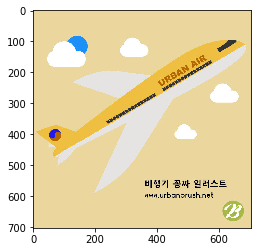

In [0]:
plt.imshow(img)

In [0]:
img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

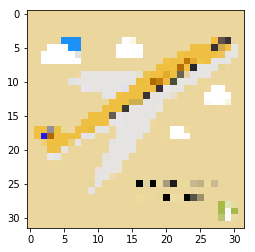

In [0]:
plt.imshow(img)

In [0]:
print(img.shape)
img_re = img.reshape(1, 32*32*3)
# img_re = img_re.astype('float32') / 255.0
print(img_re.shape)
img_re

(32, 32, 3)
(1, 3072)


array([[235, 215, 157, ..., 235, 215, 157]], dtype=uint8)

In [0]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
result = tf.argmax(model, 1)
res_idx = sess.run(result, feed_dict={X: img_re.reshape(-1, 32, 32, 3),
                                      keep_prob: 1})
print('예측 레이블 :', label_names[res_idx[0]])

예측 레이블 : airplane
